# Tcl
<hr style="border-top-width: 4px; border-top-color: #34609b;">
How to write a TClonesArray to a TTree

The following tests can be run
Interactive tests
```
Root > .x tcl.C        //no-split interpreted
Root > .x tcl.C(1)     //split    interpreted
Root > .x tcl.C++      //no-split compiled
Root > .x tcl.C++(1)   //split    compiled
```
Batch tests: same as above but with no graphics
```bash
root -b -q tcl.C
root -b -q tcl.C++
root -b -q "tcl.C(1)"
root -b -q "tcl.C++(1)"
```



**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Tuesday, January 17, 2017 at 02:43 PM.</small></i>

In [1]:
%%cpp -d
#include "TFile.h"
#include "TClonesArray.h"
#include "TH2.h"
#include "TLine.h"
#include "TTree.h"
#include "TBenchmark.h"
#include "TRandom.h"

 A helper function is created: 

In [2]:
%%cpp -d
void tclwrite(Int_t split)
{
// Generate a Tree with a TClonesArray
// The array can be split or not
   TFile f("tcl.root","recreate");
   f.SetCompressionLevel(1); //try level 2 also
   TTree T("T","test tcl");
   TClonesArray *arr = new TClonesArray("TLine");
   TClonesArray &ar = *arr;
   T.Branch("tcl",&arr,256000,split);
   //By default a TClonesArray is created with its BypassStreamer bit set.
   //However, because TLine has a custom Streamer, this bit was reset
   //by TTree::Branch above. We set again this bit because the current
   //version of TLine uses the automatic Streamer.
   //BypassingStreamer saves space and time.
   arr->BypassStreamer();
   for (Int_t ev=0;ev<10000;ev++) {
      ar.Clear();
      Int_t nlines = Int_t(gRandom->Gaus(50,10));
      if(nlines < 0) nlines = 1;
      for (Int_t i=0;i<nlines;i++) {
         Float_t x1 = gRandom->Rndm();
         Float_t y1 = gRandom->Rndm();
         Float_t x2 = gRandom->Rndm();
         Float_t y2 = gRandom->Rndm();
         new(ar[i]) TLine(x1,y1,x2,y2);
      }
      T.Fill();
   }
   T.Print();
   T.Write();
}

 A helper function is created: 

In [3]:
%%cpp -d
void tclread()
{
// read file generated by tclwrite
// loop on all entries.
// histogram center of lines
   TFile *f = new TFile("tcl.root");
   TTree *T = (TTree*)f->Get("T");
   TH2F *h2 = new TH2F("h2","center of lines",40,0,1,40,0,1);

   TClonesArray *arr = new TClonesArray("TLine");
   T->GetBranch("tcl")->SetAutoDelete(kFALSE);
   T->SetBranchAddress("tcl",&arr);
   Long64_t nentries = T->GetEntries();
   for (Long64_t ev=0;ev<nentries;ev++) {
      arr->Clear();
      T->GetEntry(ev);
      Int_t nlines = arr->GetEntriesFast();
      for (Int_t i=0;i<nlines;i++) {
         TLine *line = (TLine*)arr->At(i);
         h2->Fill(0.5*(line->GetX1()+line->GetX2()), 0.5*(line->GetY1()+line->GetY2()));
      }
   }
   h2->Draw("lego");
}

 Arguments are defined. 

In [4]:
Int_t split=0;

In [5]:
gBenchmark->Start("tcl");
tclwrite(split);
tclread();
// gBenchmark->Show("tcl");

******************************************************************************
*Tree    :T         : test tcl                                               *
*Entries :    10000 : Total =        24271904 bytes  File  Size =    9327573 *
*        :          : Tree compression factor =   2.59                       *
******************************************************************************
*Br    0 :tcl       : TClonesArray                                           *
*Entries :    10000 : Total  Size=   24271854 bytes  File Size  =    9327573 *
*Baskets :       95 : Basket Size=     256000 bytes  Compression=   2.59     *
*............................................................................*
tcl       : Real Time =   0.52 seconds Cpu Time =   0.50 seconds


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

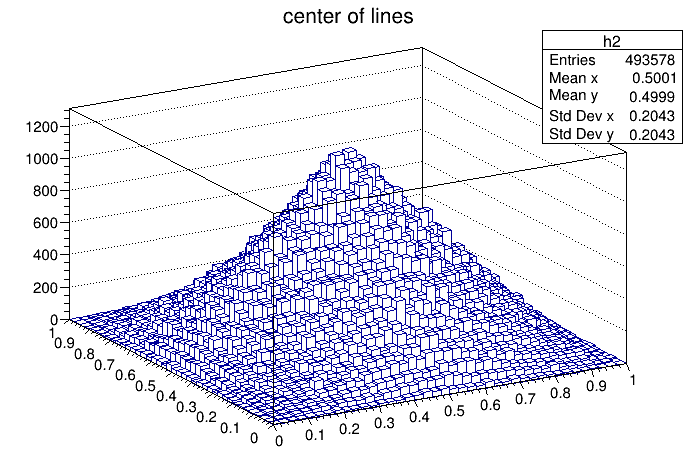

In [6]:
gROOT->GetListOfCanvases()->Draw()